In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
test_df=pd.read_csv('train.csv')

In [145]:
test_df.shape

(1460, 81)

In [146]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [147]:
#check how many null values are there in my dataset
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [148]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

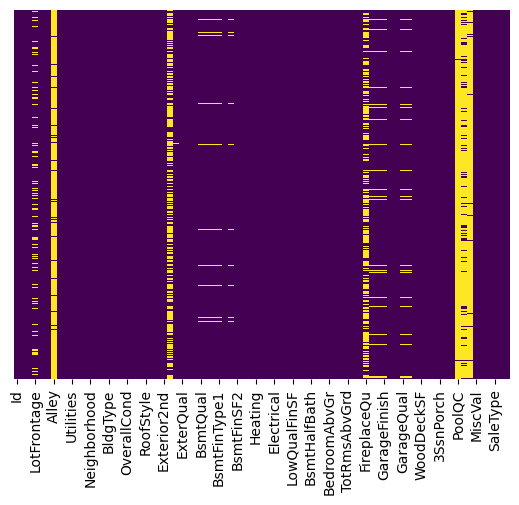

In [149]:
#to check null values in graph because we will get all attributes in this
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [150]:
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [151]:
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])

In [152]:
test_df.shape

(1460, 81)

In [153]:
test_df.drop(['Alley'],axis=1,inplace=True)

In [154]:
test_df.shape

(1460, 80)

In [155]:
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])

In [156]:
test_df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [157]:
test_df.shape

(1460, 79)

In [158]:
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

In [159]:
test_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [160]:
test_df.shape

(1460, 76)

In [161]:
test_df.drop(['Id'],axis=1,inplace=True)

In [162]:
test_df.shape

(1460, 75)

In [163]:
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])

<Axes: >

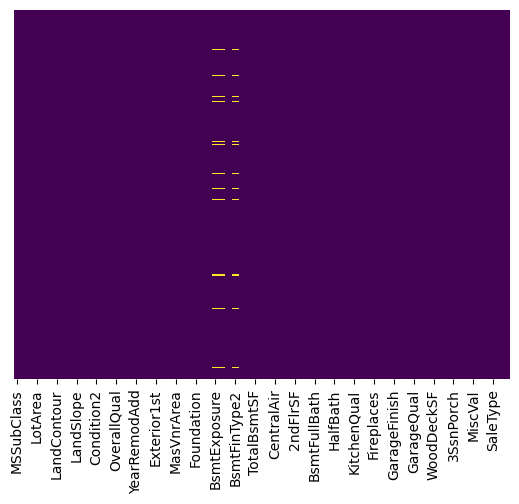

In [164]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

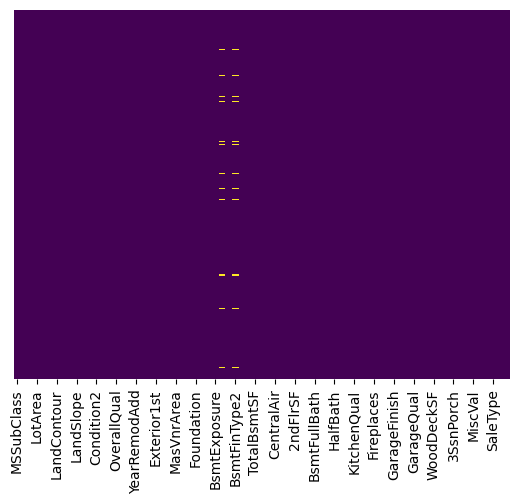

In [165]:
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [166]:
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])

In [167]:
test_df.loc[:, test_df.isnull().any()].head()

,BsmtFinType1,Electrical
0,GLQ,SBrkr
1,ALQ,SBrkr
2,GLQ,SBrkr
3,ALQ,SBrkr
4,GLQ,SBrkr


In [168]:
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [169]:
test_df.shape

(1460, 75)

In [170]:
# Assuming you want to group columns of the 'test_df' DataFrame by data types

g = test_df.columns.to_series().groupby(test_df.dtypes).groups

In [171]:
g

{int64: ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea'], object: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Garage

In [172]:
columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [173]:
len(columns)

39

In [174]:
main_df=test_df.copy()

In [178]:
test_df.to_csv('formulatedtest.csv',index=False)

In [64]:
new_df.shape

(1460, 75)

In [66]:
final_df['SalePrice']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 2919, dtype: float64

In [121]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [122]:
main_df=test_df.copy()

In [123]:
new_df=pd.read_csv('formulatedtest.csv')

In [124]:
new_df.shape

(1460, 75)

In [125]:
new_df.shape

(1460, 75)

MSZoning


KeyError: 'MSZoning'

In [127]:
final_df.shape

(2919, 175)

In [129]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [130]:
final_df.shape

(2919, 175)

In [131]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,False,False,False,False,True,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,False,False,False,False,True,False,False,False,True,False


In [132]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [133]:
df_Train.shape

(1422, 175)

In [134]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1422,50,81.0,8170,7,7,1929,1950,270.0,526.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1423,70,70.0,12320,7,7,1932,1990,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1424,70,70.0,14210,6,7,1930,1959,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1425,60,78.0,15600,5,7,1950,1963,405.0,760.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1426,30,50.0,7288,5,6,1942,1950,0.0,305.0,0.0,...,False,False,False,False,True,True,False,False,False,False


In [135]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7892\3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [136]:
df_Train.shape

(1422, 175)

In [137]:
X_train = df_Train.drop(['SalePrice'],axis=1)
y_train = df_Train['SalePrice']

In [138]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [107]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtyp

XGBoostError: [07:12:28] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\data\data.cc:507: Check failed: valid: Label contains NaN, infinity or a value too large.

In [139]:
import xgboost
regressor=xgboost.XGBRegressor()

In [140]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [113]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [141]:
y_pred=regressor.predict(df_Test)
y_pred

NotFittedError: need to call fit or load_model beforehand

In [142]:
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

NameError: name 'ann_pred' is not defined